In [19]:
import pandas as pd

df=pd.read_csv('C:/Users/H.A/Downloads/kidney_disease.csv')

print(df.shape)
df.head()

(400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [20]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
df.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [21]:
df.isnull().sum()


id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [22]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].max(),inplace=True)
df['specific gravity'].fillna(df['specific gravity'].mean(),inplace=True)
df['albumin'].fillna(df['albumin'].mean(),inplace=True)
df['sugar'].fillna(df['sugar'].mean(),inplace=True)
df['blood glucose random'].fillna(df['blood glucose random'].mean(),inplace=True)
df['blood urea'].fillna(df['blood urea'].mean(),inplace=True)
df['serum creatinine'].fillna(df['serum creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(),inplace=True)
df['packed cell volume'].fillna(df['packed cell volume'].mean(),inplace=True)
df['red blood cell count'].fillna(df['red blood cell count'].mean(),inplace=True)
df['white blood cell count'].fillna(df['white blood cell count'].mean(),inplace=True)

df['red blood cells'].fillna('normal',inplace=True)
df['pus cell'].fillna('normal',inplace=True)
df['pus cell clumps'].fillna('notpresent',inplace=True)
df['bacteria'].fillna('notpresent',inplace=True)

df['hypertension'].fillna('no',inplace=True)
df['diabetes mellitus'].fillna('no',inplace=True)
df['coronary artery disease'].fillna('no',inplace=True)

df['appetite'].fillna('good',inplace=True)
df['pedal edema'].fillna('no',inplace=True)
df['anemia'].fillna('no',inplace=True)



In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['red blood cells']=encoder.fit_transform(df['red blood cells'])
df['pus cell']=encoder.fit_transform(df['pus cell'])
df['pus cell clumps']=encoder.fit_transform(df['pus cell clumps'])
df['bacteria']=encoder.fit_transform(df['bacteria'])

#df['packed cell volume']=encoder.fit_transform(df['packed cell volume'])
#df['white blood cell count']=encoder.fit_transform(df['white blood cell count'])
#df['red blood cell count']=encoder.fit_transform(df['red blood cell count'])

df['hypertension']=encoder.fit_transform(df['hypertension'])
df['diabetes mellitus']=encoder.fit_transform(df['diabetes mellitus'])
df['coronary artery disease']=encoder.fit_transform(df['coronary artery disease'])

df['appetite']=encoder.fit_transform(df['appetite'])
df['pedal edema']=encoder.fit_transform(df['pedal edema'])
df['anemia']=encoder.fit_transform(df['anemia'])
df['class']=encoder.fit_transform(df['class'])

In [24]:
#df['white blood cell count'].value_counts()
df.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red blood cells          400 non-null    int32  
 7   pus cell                 400 non-null    int32  
 8   pus cell clumps          400 non-null    int32  
 9   bacteria                 400 non-null    int32  
 10  blood glucose random     400 non-null    float64
 11  blood urea               400 non-null    float64
 12  serum creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [26]:
df = df.drop(['id'], axis=1)
df = df.drop(['class'], axis=1)
df.shape

(400, 24)

In [44]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [45]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


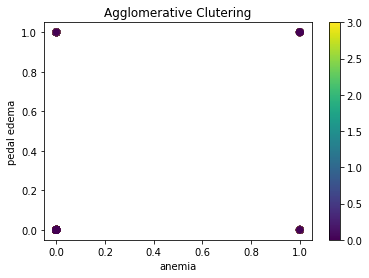

In [46]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['anemia'] , df ['pedal edema'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("anemia")
ax.set_ylabel("pedal edema")
plt.colorbar(scatter)

In [33]:
#KMean
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [34]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,1
2,2
3,1
4,2
...,...
395,1
396,2
397,1
398,2


In [35]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[5.50712127e+01 8.33766234e+01 1.01648872e+00 1.18269866e+00
  7.76630777e-01 8.44155844e-01 7.92207792e-01 1.55844156e-01
  7.79220779e-02 1.63121151e+02 5.57873845e+01 2.77100471e+00
  1.38154205e+02 4.36563853e+00 1.24893417e+01 3.81975600e+01
  1.07688312e+04 4.58884560e+00 4.28571429e-01 1.40259740e+00
  1.42857143e-01 2.20779221e-01 1.81818182e-01 1.81818182e-01]
 [4.72822535e+01 7.97222222e+01 1.01892666e+00 7.88606403e-01
  2.26865042e-01 8.98148148e-01 8.14814815e-01 9.25925926e-02
  3.70370370e-02 1.37476280e+02 5.78028045e+01 3.29064646e+00
  1.35801887e+02 4.83980888e+00 1.30483929e+01 4.04019360e+01
  5.73796296e+03 5.08933128e+00 2.77777778e-01 1.22222222e+00
  7.40740741e-02 1.38888889e-01 1.20370370e-01 1.75925926e-01]
 [5.23122346e+01 7.85221675e+01 1.01723873e+00 9.92819571e-01
  4.37216679e-01 8.91625616e-01 8.42364532e-01 7.38916256e-02
  4.43349754e-02 1.46654204e+02 5.54283607e+01 2.97105686e+00
  1.38482593e+02 4.64231243e+00 1.24121624e+01 3.87369010e+01
  8.35

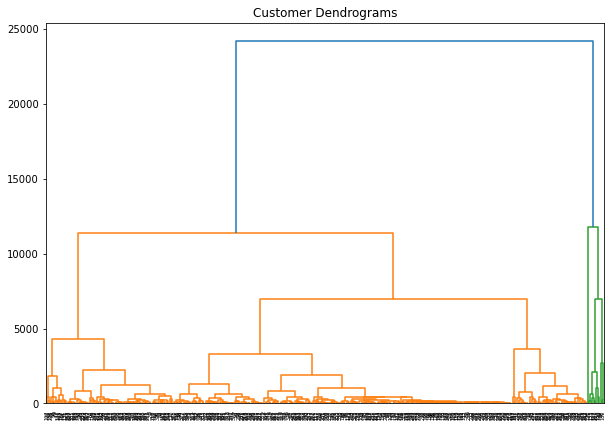

In [37]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))


In [39]:
Sum_of_squared_distances=[]
K= range(1,15)
for k in K:
    Km =KMeans(n_clusters=k)
    km =Km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\H.A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


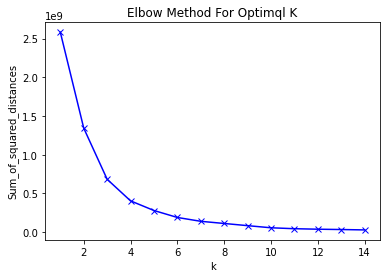

In [40]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimql K')
plt.show()

In [47]:
print('the best value of k is 4')

the best value of k is 4


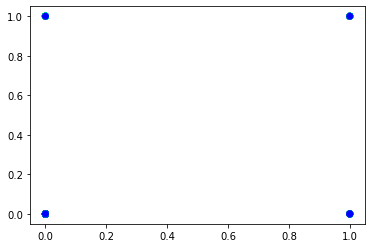

In [43]:
import matplotlib.pyplot as plt
plt.scatter(df ['anemia'] , df ['pedal edema'],
           c = KMeans(n_clusters = 4).fit_predict(df), cmap =plt.cm.winter) 
plt.show()